### Adama Konate - Assignment 12: Preprocessing Data for scikit-learn - IS 362 

Tasks: • First study the dataset and the associated description of the data (i.e. “data dictionary”). You may need to look around a bit, but it’s there! • Create a pandas DataFrame with a subset of the columns in the dataset. You should include the column that indicates edible or poisonous, the column that includes odor, and at least one other column of your choosing. • Add meaningful names for each column. • Replace the codes used in the data with numeric values—for example, in the first “target” column, “e” might become 0 and “p” might become 1. This is because your downstream processing in Project 4 using scikit-learn requires that values be stored as numerics. • Perform exploratory data analysis: show the distribution of data for each of the columns you selected, and show scatterplots for edible/poisonous vs. odor as well as the other column that you selected. • Include some text describing your preliminary conclusions about whether either of the other columns could be helpful in predicting if a specific mushroom is edible or poisonous.

### Importing modules

In [1]:
import urllib.request
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from matplotlib import pyplot as plt
import seaborn as sns

Download and / or create the data frame found in https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/

Creating a data frame with the data.  

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


#Updating the file

Create a pandas DataFrame with a subset of columns in the dataset. There are three columns that indicate: whether the mushrooms are edible or poisonous, their odor, and their population

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', 
                            sep=',', 
                            header=None, 
                            usecols=[0,5,21], 
                            names=['Edible/Poisonous','Odor','Population'])

In [5]:
df.head()

,Edible/Poisonous,Odor,Population
0,p,p,s
1,e,a,n
2,e,l,n
3,p,p,s
4,e,n,a


Replacing the codes used in the data with numeric values

In [6]:
df['Edible/Poisonous'].replace({'e':0, 'p': 1}, inplace=True)
df['Odor'].replace({'a':0, 'l':1, 'c':2, 'y':3, 'f':4, 'm':5, 'n':6, 'p':7, 's':8}, inplace=True)
df['Population'].replace({'a':0, 'c':1, 'n':2, 's':3, 'v':4, 'y':5}, inplace=True)

In [7]:
df

,Edible/Poisonous,Odor,Population
0,1,7,3
1,0,0,2
2,0,1,2
3,1,7,3
4,0,6,0
...,...,...,...
8119,0,6,1
8120,0,6,4
8121,0,6,1
8122,1,3,4


#Creating the graphs

The first graph shows the data in the "Edible/Poisonous" column. This data shows that there are more edible mushrooms than poisonous.

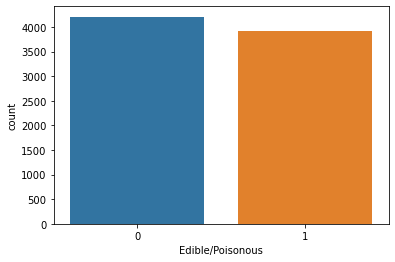

In [8]:
sns.countplot(x = 'Edible/Poisonous', data = df)

This graph is showing the data in the Odor column.

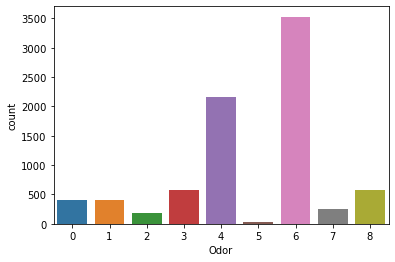

In [9]:
sns.countplot(x = 'Odor', data = df)

This graph shows the data in the Population column.

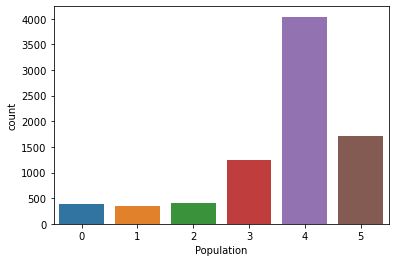

In [10]:
sns.countplot(x = 'Population', data = df)

This scatterplot shows the distribution of data between Edible/Poisonous mushrooms vs. odor vs. population

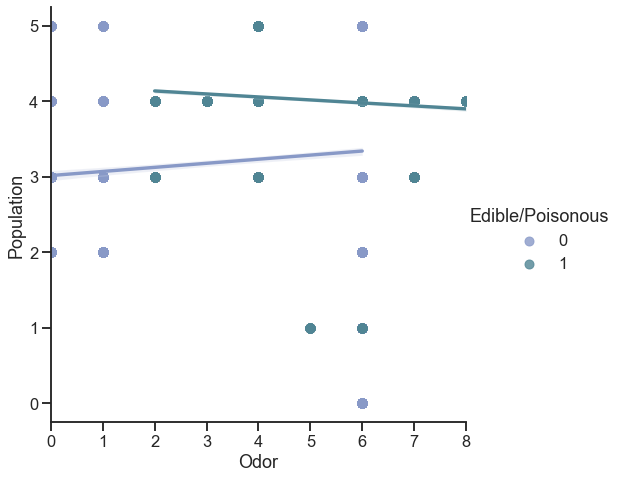

In [11]:
sns.set(style="ticks", context="talk")
pal = sns.cubehelix_palette(4, 1.5, .75, light=.6, dark=.2)
g = sns.lmplot(x='Odor', y='Population', hue='Edible/Poisonous', data=df, palette=pal, height=7)
g.set_axis_labels('Odor', 'Population')
plt.show()

- Odor is the most helpful of the three criteria.
- Looking at the colors of the caps and gills of the mushrooms only provides a minimal amount of help, because there is a an overlap between what is poisonous and what is edible. 
- many colors can have mushrooms from either category.